# GEMA CARRETERO RIVAS
Problema 1 y 3

Cargamos la extensión (magic) que nos permite utilizar SQL:

In [105]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


Descargamos el fichero que corresponde a nuestra base de datos.

In [106]:
!pip install gdown==4.6.3
!gdown 1Osmr7qVN0NMuqYxvLesNn7H4nqPCVbsU

Downloading...
From: https://drive.google.com/uc?id=1Osmr7qVN0NMuqYxvLesNn7H4nqPCVbsU
To: /content/data_berka.db
100% 70.2M/70.2M [00:01<00:00, 63.6MB/s]


Nos conectamos a la base de datos.

In [107]:
%sql sqlite:///data_berka.db

Comprobamos que tablas tiene cargada la base de datos.

In [108]:
%%sql
SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%';

 * sqlite:///data_berka.db
Done.


name
DISTRICT
ACCOUNT
TRANS
CLIENT
DISPOSITION
CREDIT_CARD
LOAN
PERMANENT_ORDER


**Problema 1**

La consulta o consultas necesarias para obtener los siguientes datos:

1. Seleccionar a los clientes con préstamos finalizados y tarjeta de crédito.

Para cada uno de ellos se necesita la siguiente información:

• Año de nacimiento del cliente

• Datos geográficos del cliente (se pueden elegir libremente)

• Datos relevantes del préstamo (cantidad, duración, pagos)

• Información procedente de la tabla de transacciones (opcional).

• Tipo de tarjeta de crédito que tiene el cliente

In [109]:
%%sql clientes <<
SELECT
    c.client_id,
    SUBSTRING(c.birth_number, 1, 2) AS birth_year,
    d.A2 AS nombre_distrito,
    d.A3 AS region,
    l.amount AS cantidad_prestamo,
    l.duration AS duracion_prestamo,
    l.payments AS pagos_mensuales,
    cc.type AS tipo_tarjeta_credito
    FROM
    client c
JOIN
    disposition dp ON c.client_id = dp.client_id
JOIN
    account a ON dp.account_id = a.account_id
JOIN
    district d ON a.district_id = d.A1
LEFT JOIN
    loan l ON a.account_id = l.account_id AND l.status = 'A'
LEFT JOIN
    credit_card cc ON a.account_id = cc.disp_id
WHERE
    l.loan_id IS NOT NULL
    AND cc.card_id IS NOT NULL;

 * sqlite:///data_berka.db
Done.
Returning data to local variable clientes


Información procedente de la tabla de transacciones (opcional):

In [110]:
%%sql
select trans_id, t.date, type, operation, amount, balance
FROM trans t JOIN account a ON  t.account_id = a.account_id
             JOIN district d ON a.district_id = d.A1
LIMIT 10

 * sqlite:///data_berka.db
Done.


trans_id,date,type,operation,amount,balance
695247,930101,PRIJEM,VKLAD,700.0,700.0
171812,930101,PRIJEM,VKLAD,900.0,900.0
207264,930101,PRIJEM,VKLAD,1000.0,1000.0
1117247,930101,PRIJEM,VKLAD,600.0,600.0
579373,930102,PRIJEM,VKLAD,400.0,400.0
771035,930102,PRIJEM,VKLAD,1100.0,1100.0
452728,930103,PRIJEM,VKLAD,600.0,600.0
725751,930103,PRIJEM,VKLAD,1100.0,1100.0
497211,930103,PRIJEM,VKLAD,200.0,200.0
232960,930103,PRIJEM,VKLAD,800.0,800.0


In [111]:
df_clientes =  clientes.DataFrame()

In [112]:
df_clientes.to_csv("clientes.csv")

A continuación mostraremos las primeras filas del DataFrame:

In [113]:
print(df_clientes.head())

   client_id birth_year  nombre_distrito         region  cantidad_prestamo  \
0        158         45          Teplice  north Bohemia              88440   
1        159         38          Teplice  north Bohemia              88440   
2        798         40      Plzen - jih   west Bohemia              12540   
3        799         36      Plzen - jih   west Bohemia              12540   
4        980         61  Usti nad Orlici   east Bohemia              48624   

   duracion_prestamo  pagos_mensuales tipo_tarjeta_credito  
0                 12             7370              classic  
1                 12             7370              classic  
2                 12             1045               junior  
3                 12             1045               junior  
4                 24             2026              classic  


**Problema 3**

Realizar un arbol de decisión con el fin de resolver el problema de predecir la tarjeta de crédito que va a contratar un cliente a partir de los datos
obtenidos del Problema 1 .

Para realizar el árbol de decisión cargaremos los datos desde el archivo CSV. A continuación, analizaremos las variables predictoras y la variable ojetivo y dividiremos el conjunto de datos en entrenamiento y prueba. Finalmente, crearemos el modelo de árbol de decisión y lo visualizaremos:




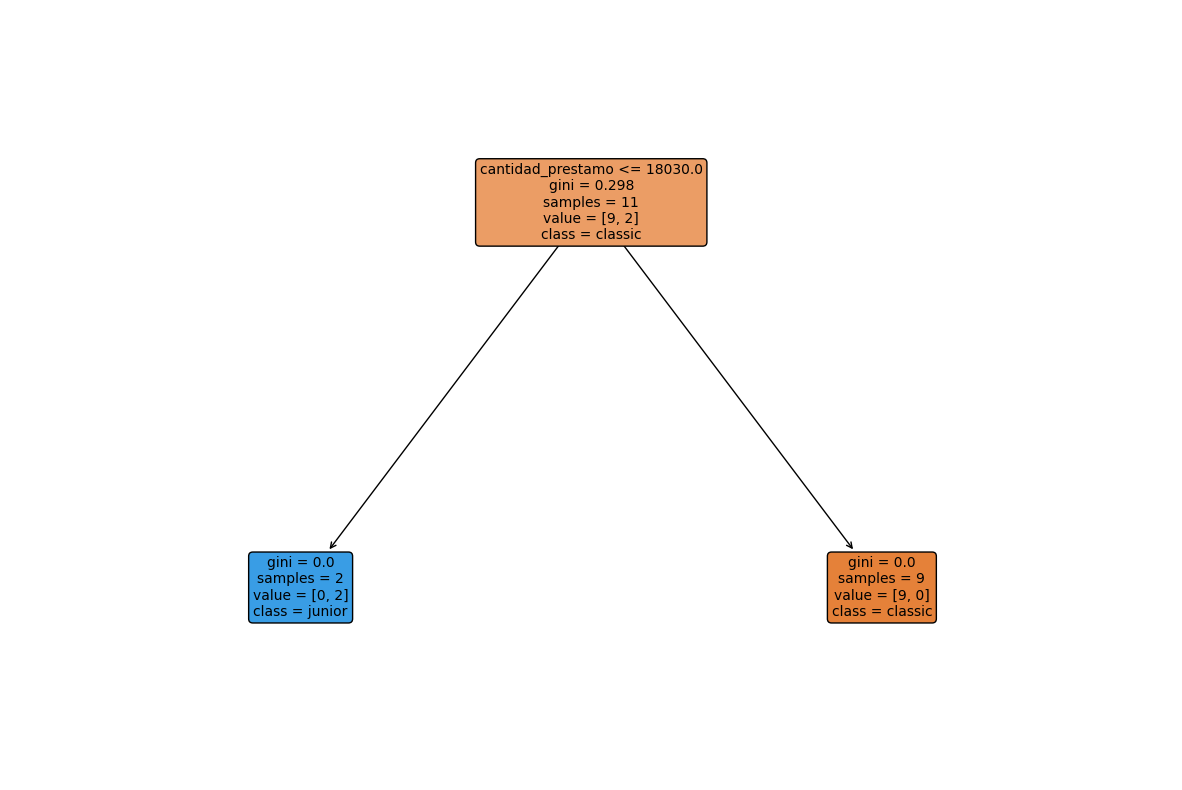

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

df_clientes = pd.read_csv("clientes.csv")
X = df_clientes.drop(['tipo_tarjeta_credito', 'nombre_distrito', 'region'], axis=1)
y = df_clientes['tipo_tarjeta_credito']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X_train, y_train)
plt.figure(figsize=(15, 10))
plot_tree(modelo_arbol, feature_names=X.columns, class_names=modelo_arbol.classes_, filled=True, rounded=True, fontsize=10)
plt.show()

**cantidad_prestamo** es la característica principal que se utiliza para realizar las divisiones. La estructura del árbol reflejará cómo esta característica específica contribuye a la toma de decisiones en cada nivel del árbol.

Los nodos y ramas más cercanos a las hojas que tienen muestras (samples) muy pequeñas y contribuyen poco a la clasificación podrían considerarse menos relevantes.